In [2]:
import numpy as np
import pandas as pd
import json, os, pathlib
from IPython.display import display, Image
import cv2
from matplotlib import pyplot as plt 
from skimage.segmentation import mark_boundaries

In [3]:
with open("places_trained_data_result2.json") as f:
  test_result = json.load(f)

In [4]:
with open("ace_json_results/ace_DenseNet_bus-station-indoor.json") as f:
  d_bus = json.load(f)
with open("ace_json_results/ace_Resnet_bus-station-indoor.json") as f:
  r_bus = json.load(f)
with open("ace_json_results/ace_Inception_bus-station-indoor.json") as f:
  i_bus = json.load(f)

with open("ace_json_results/ace_DenseNet_computer-room.json") as f:
  d_com = json.load(f)
with open("ace_json_results/ace_Resnet_computer-room.json") as f:
  r_com = json.load(f)
with open("ace_json_results/ace_Inception_computer-room.json") as f:
  i_com = json.load(f)

with open("ace_json_results/ace_DenseNet_church-outdoor.json") as f:
  d_church = json.load(f)
with open("ace_json_results/ace_Resnet_church-outdoor.json") as f:
  r_church = json.load(f)
with open("ace_json_results/ace_Inception_church-outdoor.json") as f:
  i_church = json.load(f)

In [4]:
'''with open("ace_json_results/ace_DenseNet_gas-station.json") as f:
  d_gas = json.load(f)
with open("ace_json_results/ace_Resnet_gas-station.json") as f:
  r_gas = json.load(f)

with open("ace_json_results/ace_DenseNet_tree-house.json") as f:
  d_tree = json.load(f)
with open("ace_json_results/ace_Resnet_tree-house.json") as f:
  r_tree = json.load(f)

with open("ace_json_results/ace_DenseNet_vineyard.json") as f:
  d_vine = json.load(f)
with open("ace_json_results/ace_Resnet_vineyard.json") as f:
  r_vine = json.load(f)

with open("ace_json_results/ace_Densenet_aquarium.json") as f:
  d_aqua = json.load(f)
with open("ace_json_results/ace_Resnet_aquarium.json") as f:
  r_aqua = json.load(f)

with open("ace_json_results/ace_DenseNet_golf-course.json") as f:
  d_golf = json.load(f)
with open("ace_json_results/ace_Resnet_golf-course.json") as f:
  r_golf = json.load(f)

with open("ace_json_results/ace_DenseNet_amusement-park.json") as f:
  d_amuse = json.load(f)
with open("ace_json_results/ace_Resnet_amusement-park.json") as f:
  r_amuse = json.load(f)'''

'with open("ace_json_results/ace_DenseNet_gas-station.json") as f:\n  d_gas = json.load(f)\nwith open("ace_json_results/ace_Resnet_gas-station.json") as f:\n  r_gas = json.load(f)\n\nwith open("ace_json_results/ace_DenseNet_tree-house.json") as f:\n  d_tree = json.load(f)\nwith open("ace_json_results/ace_Resnet_tree-house.json") as f:\n  r_tree = json.load(f)\n\nwith open("ace_json_results/ace_DenseNet_vineyard.json") as f:\n  d_vine = json.load(f)\nwith open("ace_json_results/ace_Resnet_vineyard.json") as f:\n  r_vine = json.load(f)\n\nwith open("ace_json_results/ace_Densenet_aquarium.json") as f:\n  d_aqua = json.load(f)\nwith open("ace_json_results/ace_Resnet_aquarium.json") as f:\n  r_aqua = json.load(f)\n\nwith open("ace_json_results/ace_DenseNet_golf-course.json") as f:\n  d_golf = json.load(f)\nwith open("ace_json_results/ace_Resnet_golf-course.json") as f:\n  r_golf = json.load(f)\n\nwith open("ace_json_results/ace_DenseNet_amusement-park.json") as f:\n  d_amuse = json.load(f)\

In [19]:
idx_list = []
idx_correct_list = []
high_conf_inc_list = []
low_conf_cor_list = []
incorrect_dict = dict()
correct_dict = dict()
high_conf_inc_dict = dict()
low_conf_cor_dict = dict()
for i in range(len(test_result)):
  cur = test_result[i]
  if cur['inception_predicted_label'] != cur['densenet_predicted_label']:
    idx_list.append(i)
    if cur['label'] in incorrect_dict.keys():
      incorrect_dict[cur['label']].append(i)
    else:
      incorrect_dict[cur['label']] = [i]
  elif cur['inception_predicted_label'] == cur['densenet_predicted_label']:
    idx_correct_list.append(i)
    if cur['label'] in correct_dict.keys():
      correct_dict[cur['label']].append(i)
    else:
      correct_dict[cur['label']] = [i]
  if cur['label_int'] != cur['resnet_predicted_label']:
    max_idx = np.argmax(cur['resnet_predicted_score'])
    if cur['resnet_predicted_score'][max_idx] > 0.8:
      high_conf_inc_list.append(i)
      if cur['label'] in high_conf_inc_dict.keys():
        high_conf_inc_dict[cur['label']].append(i)
      else:
        high_conf_inc_dict[cur['label']] = [i]
  elif cur['label_int'] == cur['resnet_predicted_label']:
    max_idx = np.argmax(cur['densenet_predicted_score'])
    if cur['resnet_predicted_score'][max_idx] < 0.6:
      low_conf_cor_list.append(i)
      if cur['label'] in low_conf_cor_dict.keys():
        low_conf_cor_dict[cur['label']].append(i)
      else:
        low_conf_cor_dict[cur['label']] = [i]


In [7]:
labels = ['airfield', 'amusement-park', 'aquarium', 'bathroom', 'bus-station-indoor', 'canal-urban', 'church-outdoor', 'computer-room', 'crosswalk', 'gas-station', 'golf-course', 'gymnasium-indoor', 'restaurant-kitchen', 'tree-house', 'vineyard']

In [8]:
labels_dict = dict()
for idx in range(len(labels)):
  labels_dict[idx] = labels[idx]

In [9]:
print(labels_dict)

{0: 'airfield', 1: 'amusement-park', 2: 'aquarium', 3: 'bathroom', 4: 'bus-station-indoor', 5: 'canal-urban', 6: 'church-outdoor', 7: 'computer-room', 8: 'crosswalk', 9: 'gas-station', 10: 'golf-course', 11: 'gymnasium-indoor', 12: 'restaurant-kitchen', 13: 'tree-house', 14: 'vineyard'}


In [10]:
incorrect_dict

{'amusement-park': [111, 118, 122, 130, 147, 161, 177, 180, 181, 185, 186],
 'aquarium': [203, 220],
 'bathroom': [307, 316, 327, 337, 384],
 'bus-station-indoor': [404, 405, 412, 429, 431, 440, 445, 451, 455, 463, 473],
 'canal-urban': [517],
 'church-outdoor': [615, 624, 626, 638, 654, 690],
 'computer-room': [724, 742, 744, 745, 749, 776, 783, 786, 798],
 'crosswalk': [801, 814, 826, 842, 844, 862, 863, 872, 879],
 'gas-station': [923, 928, 936, 954, 995],
 'golf-course': [1002,
  1007,
  1009,
  1011,
  1013,
  1018,
  1035,
  1036,
  1050,
  1082,
  1091],
 'gymnasium-indoor': [1106, 1161, 1190],
 'restaurant-kitchen': [1200, 1205, 1219, 1228, 1230, 1265, 1286],
 'tree-house': [1310, 1312, 1332, 1346, 1355, 1361, 1386, 1387],
 'vineyard': [1428, 1434, 1436, 1442, 1446, 1467, 1471, 1478, 1481, 1498]}

In [20]:
high_conf_inc_dict

{'amusement-park': [111, 118, 130, 131, 132, 147],
 'aquarium': [203, 220, 244, 291],
 'bathroom': [319, 337, 384],
 'bus-station-indoor': [404, 437, 455, 463],
 'canal-urban': [517, 595],
 'church-outdoor': [615, 633, 638, 667, 690],
 'computer-room': [744, 749, 756, 780, 783],
 'crosswalk': [801, 807, 844, 846],
 'gas-station': [907, 924, 949, 957, 975, 978, 993],
 'golf-course': [1007, 1009, 1013, 1021, 1051, 1073, 1082, 1091],
 'gymnasium-indoor': [1136, 1148, 1151],
 'restaurant-kitchen': [1204, 1219, 1263],
 'tree-house': [1302, 1331, 1332, 1339, 1362, 1370],
 'vineyard': [1407, 1433, 1446, 1467, 1478]}

In [21]:
low_conf_cor_dict

{'amusement-park': [161, 181],
 'aquarium': [253],
 'bus-station-indoor': [412, 431, 445, 451, 473, 497],
 'canal-urban': [599],
 'church-outdoor': [626],
 'computer-room': [720, 742, 776, 782, 786],
 'crosswalk': [842, 872, 879],
 'gas-station': [923, 936, 995],
 'golf-course': [1002, 1011],
 'gymnasium-indoor': [1106],
 'restaurant-kitchen': [1228, 1230, 1286],
 'tree-house': [1342, 1346, 1386]}

In [35]:
print(correct_dict['computer-room'])
print(correct_dict['church-outdoor'])
print(correct_dict['bus-station-indoor'])

[23, 44, 54, 65, 69, 79, 91, 94, 124, 132, 145, 155, 173, 184, 194, 270]
[4, 5, 19, 56, 66, 89, 93, 157, 158, 175, 179, 188, 191, 214, 221, 233, 261]
[0, 10, 49, 58, 59, 80, 84, 133, 196, 215, 220, 238, 268]


In [22]:
def get_img_ace_id(idx, result_data, ace_data):
  file_name = result_data[idx]['file_names']
  
  file_names_val = list(ace_data['filename_match'].keys())
  #print(len(file_names_val))
  for idx in range(len(file_names_val)):
    val = str(file_names_val[idx])
    if str(file_name) in val:
      img_id = ace_data['filename_match'][val]
      return img_id
      
  return 'None'

In [23]:
def get_overlap_mask(concept_id1, img_id1, ace_file1, concept_id2, img_id2, ace_file2):
  img1_id = (img_id1.split("_"))[0]
  img2_id = (img_id2.split("_"))[0]

  if img1_id != img2_id:
    print("image id error")
    return None

  raw_images_file = ace_file1['results']['raw_image']
  model1_json_name = ace_file1['masked'][concept_id1]['masked_json']
  model2_json_name = ace_file2['masked'][concept_id2]['masked_json']

  with open(raw_images_file) as f:
    raw_imgs = json.load(f)

  with open(model1_json_name) as f:
    model1_mask = json.load(f)
  
  with open(model2_json_name) as f:
    model2_mask = json.load(f)

  raw_image = raw_imgs['raw_img_value'][img1_id]
  raw_image = np.reshape(raw_image, model1_mask['image_size'])

  m1_mask = model1_mask['mask_value'][img_id1]
  m1_mask = np.reshape(m1_mask, model1_mask['mask_size'])

  m2_mask = model2_mask['mask_value'][img_id2]
  m2_mask = np.reshape(m2_mask, model2_mask['mask_size'])

  b_img1 = mark_boundaries(raw_image, m1_mask, color = (1,1,0), mode = 'thick')
  b_img2 = mark_boundaries(b_img1, m2_mask, color = (1,0,1), mode = 'thick')

  return b_img2
  
  

In [40]:
img_id = get_img_ace_id(240, test_result, r_bus)
print(img_id)

concepts = r_bus['concept']
patches = dict()
concepts_keys = concepts.keys()
for key in concepts_keys:
  concept_num = key.split("_")[-2]
  con = concepts[key]['file']
  tcav_score = concepts[key]['tcav_score']
  for c in range(len(con)):
    name = con[c]
    name_list = str((name.split("\\"))[-1])
    concept_id = name_list.split(".")[0]
    if img_id in name:
      if concept_num in patches.keys():
        patches[concept_num]['path'].append(name)
        patches[concept_num]['tcav_score'].append(tcav_score[c])
        patches[concept_num]['concept_id'].append(concept_id)
      else:
        patches[concept_num] = dict()
        patches[concept_num]['path'] = [name]
        patches[concept_num]['tcav_score'] = [tcav_score[c]]
        patches[concept_num]['concept_id'] = [concept_id]

masked = r_bus['masked']
mask_patches = dict()
masks_keys = masked.keys()
for key in masks_keys:
  #masked_num = key.split("_")[-2]
  mask = masked[key]['file']
  for m in range(len(mask)):
    name = mask[m]
    if img_id in name:
      if key in mask_patches.keys():
        mask_patches[key]['path'].append(name)
      else:
        mask_patches[key] = dict()
        mask_patches[key]['path'] = [name]

tcavs = r_bus['summary']
patch_concepts = list(patches.keys())
print(patch_concepts)
for p in range(len(patch_concepts)):
  concept_name = patch_concepts[p]
  print(concept_name)
  for i in range(len(tcavs)):
    tcav = tcavs[i].split(":")
    if concept_name == tcav[1]:
      print(tcavs[i])
      scores = tcav[2].split(",")
      tcav_score = scores[0]
      pvalue = scores[1]
      patches[concept_name]['tcav'] = tcav_score
      patches[concept_name]['pvalue'] = pvalue      


None
[]


In [41]:
masked = r_bus['full_masked']
for mask in masked:
  if img_id+"_tcav" in mask:
    full_mask_image = mask

In [42]:
tcavs = r_bus['summary']
concept_name_rank = []
for idx in range(len(tcavs)):
  cur = tcavs[idx]
  cur_list = cur.split(":")
  c_name = cur_list[1].split("_")[-1]
  #scores = cur_list[2].split(",")
  #tcav_score = scores[0]
  concept_name_rank.append(c_name)

In [44]:
sum_res = d_bus['summary']
concept_name_score = []
for idx in range(len(sum_res)):
  cur = sum_res[idx]
  cur_list = cur.split(":")
  c_name = cur_list[1].split("_")[-1]
  scores = cur_list[2].split(",")
  tcav_score = scores[0]
  concept_name_score.append((c_name, tcav_score))

In [25]:
def get_concepts_path(img_id, ace_data):
  concepts = ace_data['concept']
  patches = dict()
  concepts_keys = concepts.keys()
  for key in concepts_keys:
    concept_num = key.split("_")[-2]
    con = concepts[key]['file']
    tcav_score = concepts[key]['tcav_score']
    for c in range(len(con)):
      name = con[c]
      #name_list = str((name.split("/"))[-1])
      name_list = str((name.split("\\"))[-1])
      concept_id = name_list.split(".")[0]
      if img_id in name:
        if concept_num in patches.keys():
          patches[concept_num]['path'].append(name)
          patches[concept_num]['tcav_score'].append(tcav_score[c])
          patches[concept_num]['concept_id'].append(concept_id)
        else:
          patches[concept_num] = dict()
          patches[concept_num]['path'] = [name]
          patches[concept_num]['tcav_score'] = [tcav_score[c]]
          patches[concept_num]['concept_id'] = [concept_id]

  #print(patches.keys())
  masks = ace_data['masked']
  mask_patches = dict()
  masks_keys = masks.keys()
  for key in masks_keys:
    #masked_num = key.split("_")[-2]
    mask = masks[key]['file']
    for m in range(len(mask)):
      name = mask[m]
      if img_id in name:
        if key in mask_patches.keys():
          mask_patches[key]['path'].append(name)
        else:
          mask_patches[key] = dict()
          mask_patches[key]['path'] = [name]
  #print(mask_patches.keys())

  full_masks = ace_data['full_masked']
  for mask in full_masks:
    if img_id+"_tcav" in mask:
      full_mask_image = mask

  tcavs = ace_data['summary']
  concept_name_rank = []
  for idx in range(len(tcavs)):
    cur = tcavs[idx]
    cur_list = cur.split(":")
    c_name = cur_list[1].split("_")[-1]
    #scores = cur_list[2].split(",")
    #tcav_score = scores[0]
    concept_name_rank.append(c_name)

  patch_concepts = list(patches.keys())
  for p in range(len(patch_concepts)):
    concept_name = patch_concepts[p]
    for i in range(len(tcavs)):
      tcav = tcavs[i].split(":")
      if concept_name == tcav[1]:
        #print(concept_name)
        scores = tcav[2].split(",")
        tcav_score = scores[0]
        pvalue = scores[1]
        patches[concept_name]['tcav'] = tcav_score
        patches[concept_name]['pvalue'] = pvalue

  return patches, mask_patches, concept_name_rank, full_mask_image

In [26]:
def get_sorted_concepts(ace_patches):
  concepts = list(ace_patches.keys())
  concept_tcav_list = []
  for idx in range(len(concepts)):
    con = concepts[idx]
    avg_tcav = ace_patches[con]['tcav']
    concept_tcav_list.append(avg_tcav)

  sorted_concepts = [x for _, x in sorted(zip(concept_tcav_list, concepts))]
  sorted_concepts.reverse()

  return sorted_concepts

In [27]:
def get_topk_tcavs(sorted_concepts, topk, ace_patches, ace_masked_patches):
  topk_concepts = sorted_concepts[:topk]
  concept_path_list = []
  masked_path_list = []
  tcav_list = []
  iid_list = []
  #pvalue_list = []
  for idx in range(len(topk_concepts)):
    con = topk_concepts[idx]
    tcav_val = np.array(ace_patches[con]['tcav_score'])
    tcav_idx = np.argmax(tcav_val)
    #choose one images from the several.
    patch_path = ace_patches[con]['path'][0]
    masked_path = ace_masked_patches[con]['path'][0]
    concept_path_list.append(patch_path)
    masked_path_list.append(masked_path)
    tcav_list.append(str(ace_patches[con]['tcav']))
    iid_list.append(str(ace_patches[con]['concept_id'][0]))
    #pvalue_list.append(str(ace_patches[con]['pvalue']))
    #print(str(con) + " tcav score: " + str(ace_patches[con]['tcav']) + ", pvalue : " + str(ace_patches[con]['pvalue']))

  return topk_concepts, concept_path_list, masked_path_list, tcav_list, iid_list

In [28]:
def show_prediction_result(img_index, test_result, ace_data1, ace_data2, ace_data3, topk):
  img_id = get_img_ace_id(img_index, test_result, ace_data1)
  print("image id : ", img_id)
  img_data = test_result[img_index]
  img_label = img_data['label']
  img = Image(img_data['file_path'], width = 200, height = 200)

  #display original img
  display(img)
  print("label : ", img_label)
  #print("label_int : ", img_data['label_int'])

  label1 = labels_dict[img_data['resnet_predicted_label']]
  label2 = labels_dict[img_data['densenet_predicted_label']]
  label3 = labels_dict[img_data['inception_predicted_label']]

  #show prediction results
  print('img - resnet: ' + str(label1) + ", prediction_score: " + str("{0:.5f}".format(float(np.max(img_data['resnet_predicted_score'])))))
  print('img - densenet: ' + str(label2) + ", prediction_score: " + str("{0:.5f}".format(float(np.max(img_data['densenet_predicted_score'])))))
  print('img - Inception: ' + str(label3) + ", prediction_score: " + str("{0:.5f}".format(float(np.max(img_data['inception_predicted_score'])))))

  ace_patches1, ace_masked_patches1, concept_name_rank1, full_masked_image1 = get_concepts_path(img_id, ace_data1)
  ace_patches2, ace_masked_patches2, concept_name_rank2, full_masked_image2 = get_concepts_path(img_id, ace_data2)
  ace_patches3, ace_masked_patches3, concept_name_rank3, full_masked_image3 = get_concepts_path(img_id, ace_data3)
  print("1:", len(ace_patches1))
  print("2:", len(ace_patches2))
  print("3:", len(ace_patches3))
  
  sorted_concepts1 = get_sorted_concepts(ace_patches1)
  sorted_concepts2 = get_sorted_concepts(ace_patches2)
  sorted_concepts3 = get_sorted_concepts(ace_patches3)

  topk_concepts1, concept_path_list1, masked_path_list1, tcav_list1, iid_list1 = get_topk_tcavs(sorted_concepts1, topk, ace_patches1, ace_masked_patches1)
  topk_concepts2, concept_path_list2, masked_path_list2, tcav_list2, iid_list2 = get_topk_tcavs(sorted_concepts2, topk, ace_patches2, ace_masked_patches2)
  topk_concepts3, concept_path_list3, masked_path_list3, tcav_list3, iid_list3 = get_topk_tcavs(sorted_concepts3, topk, ace_patches3, ace_masked_patches3)

  full_masked_img1 = Image(full_masked_image1, width = 300, height = 300)
  full_masked_img2 = Image(full_masked_image2, width = 300, height = 300)
  full_masked_img3 = Image(full_masked_image3, width = 300, height = 300)
  display(full_masked_img1)
  display(full_masked_img2)
  display(full_masked_img3)

  '''
  fig1 = plt.figure(figsize = (12, 12))
  for i in range(2):
    fig1.add_subplot(1, 2, i+1)
    if i % 2 == 0:
      full_masked_img = full_masked_image1
    else:
      full_masked_img = full_masked_image2
    image = cv2.imread(full_masked_img)
    image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis("off")'''
  
  fig2 = plt.figure(figsize = (12, 20))
  rows = np.min([len(concept_path_list1), len(concept_path_list2), len(concept_path_list3)])
  columns = 3
  j = 0
  for i in range(3 * rows):
    fig2.add_subplot(rows, columns, i+1)
    if i%3 == 0:
      img = masked_path_list1[j]
      tcav_score = str("{0:.3f}".format(float(tcav_list1[j])))
      plt.title("concept_id: " + str(topk_concepts1[j]) + ", rank: " + str(concept_name_rank1.index(topk_concepts1[j])+ 1) + 
      "\n image_id: " + str(iid_list1[j]) +", : tcav_score: " + tcav_score)
    elif i%3 == 1:
      img = masked_path_list2[j]
      tcav_score = str("{0:.3f}".format(float(tcav_list2[j])))
      plt.title("concept_id: " + str(topk_concepts2[j]) + ", rank: " + str(concept_name_rank2.index(topk_concepts2[j])+ 1) + 
      "\n image_id: " + str(iid_list2[j]) +", : tcav_score: " + tcav_score)
    else:
      img = masked_path_list3[j]
      tcav_score = str("{0:.3f}".format(float(tcav_list3[j])))
      plt.title("concept_id: " + str(topk_concepts3[j]) + ", rank: " + str(concept_name_rank3.index(topk_concepts3[j])+ 1) + 
      "\n image_id: " + str(iid_list3[j]) +", : tcav_score: " + tcav_score)
      j = j+1
    
    image = cv2.imread(img)
    image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis("off")
  

image id :  0002


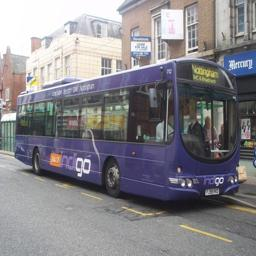

label :  bus-station-indoor
img - resnet: bus-station-indoor, prediction_score: 1.00000
img - densenet: bus-station-indoor, prediction_score: 1.00000
img - Inception: bus-station-indoor, prediction_score: 1.00000
1: 17
2: 18
3: 15


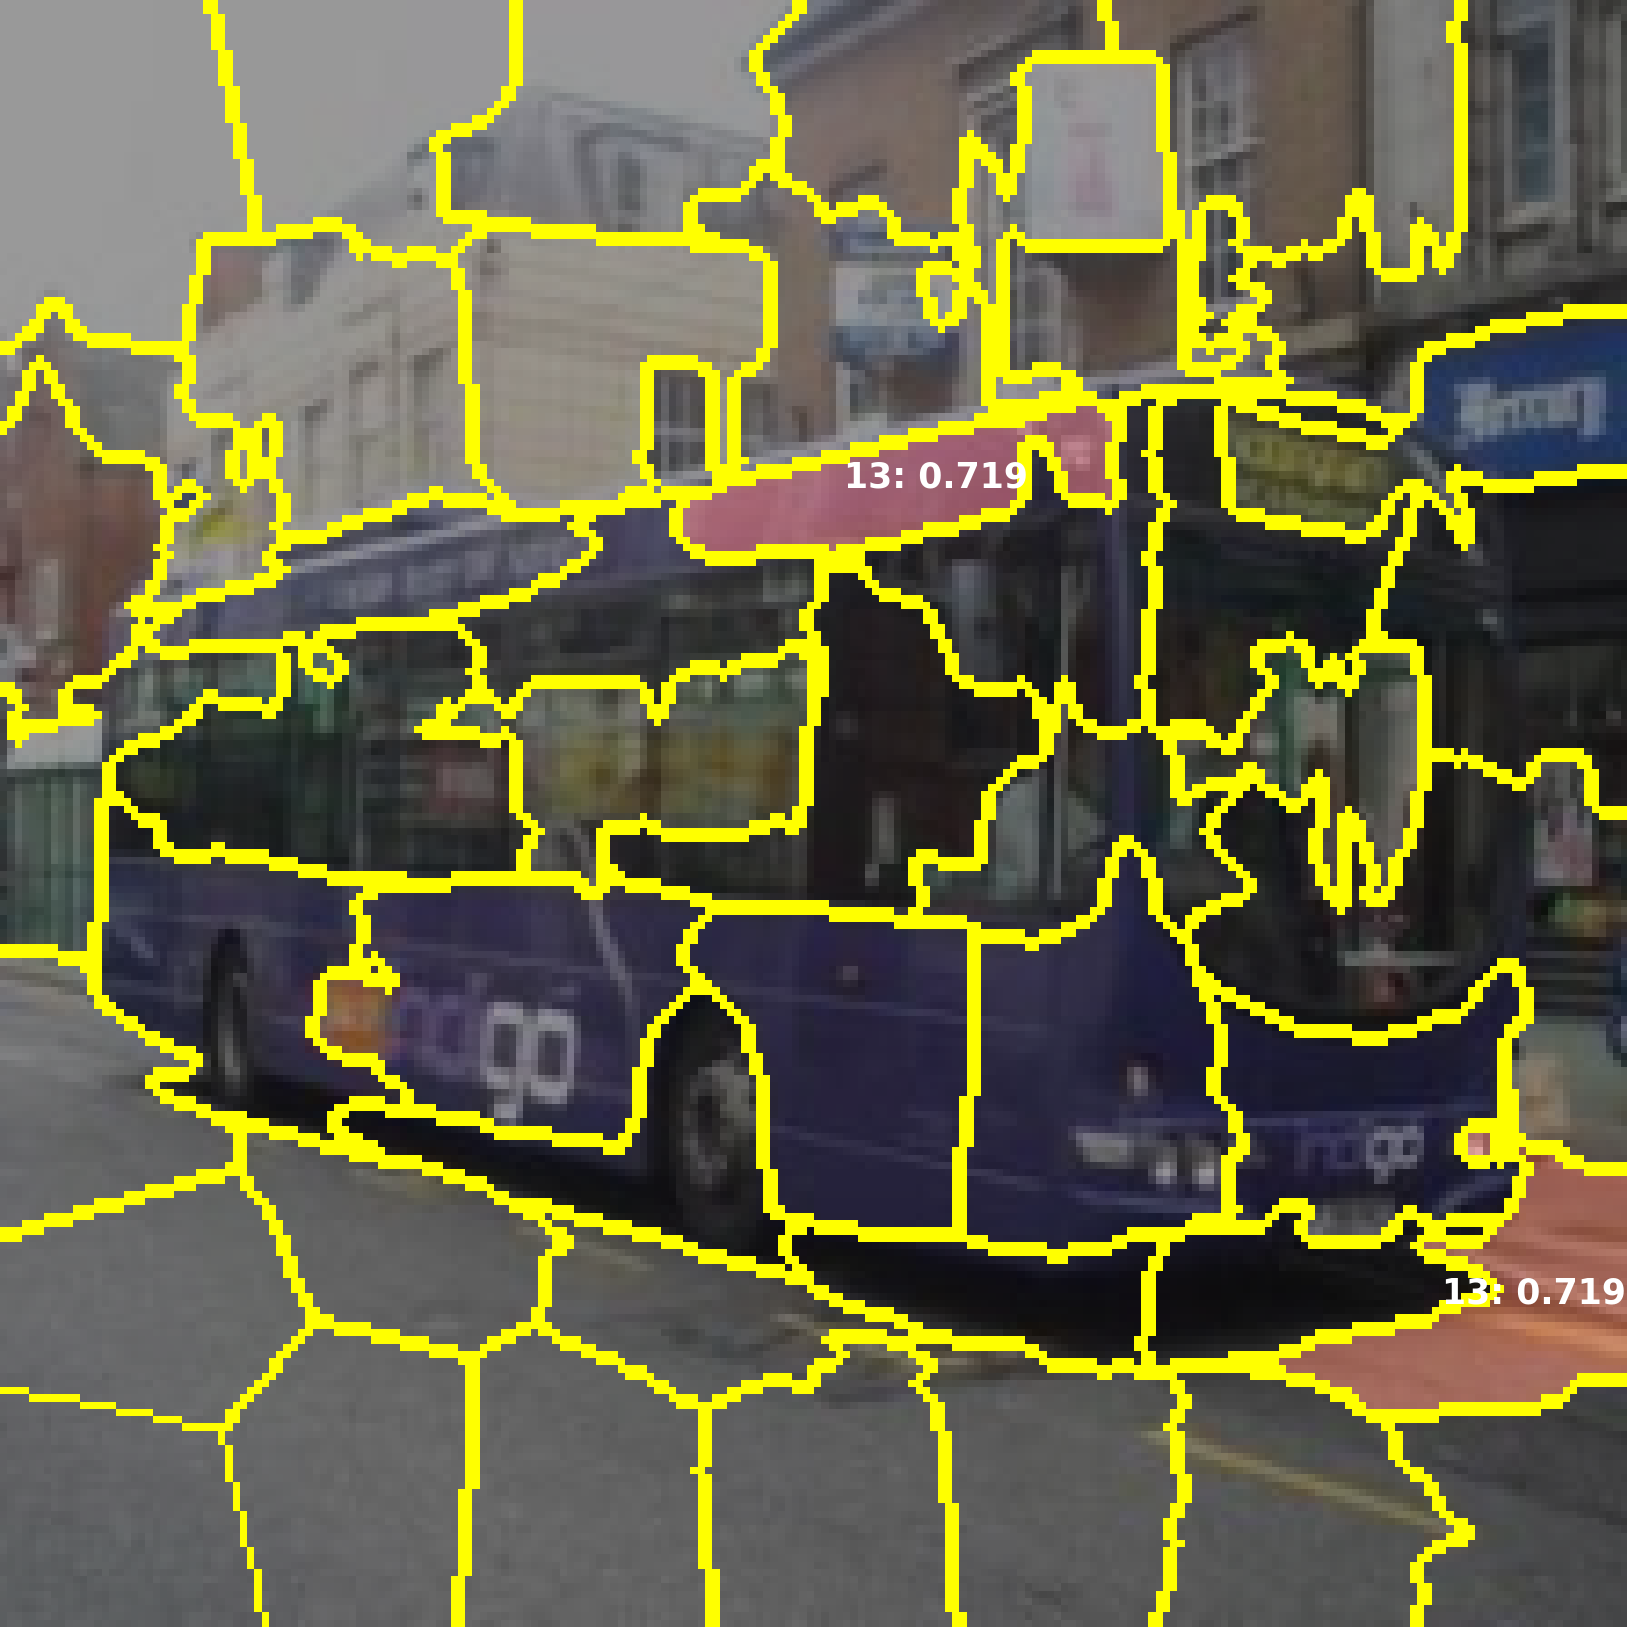

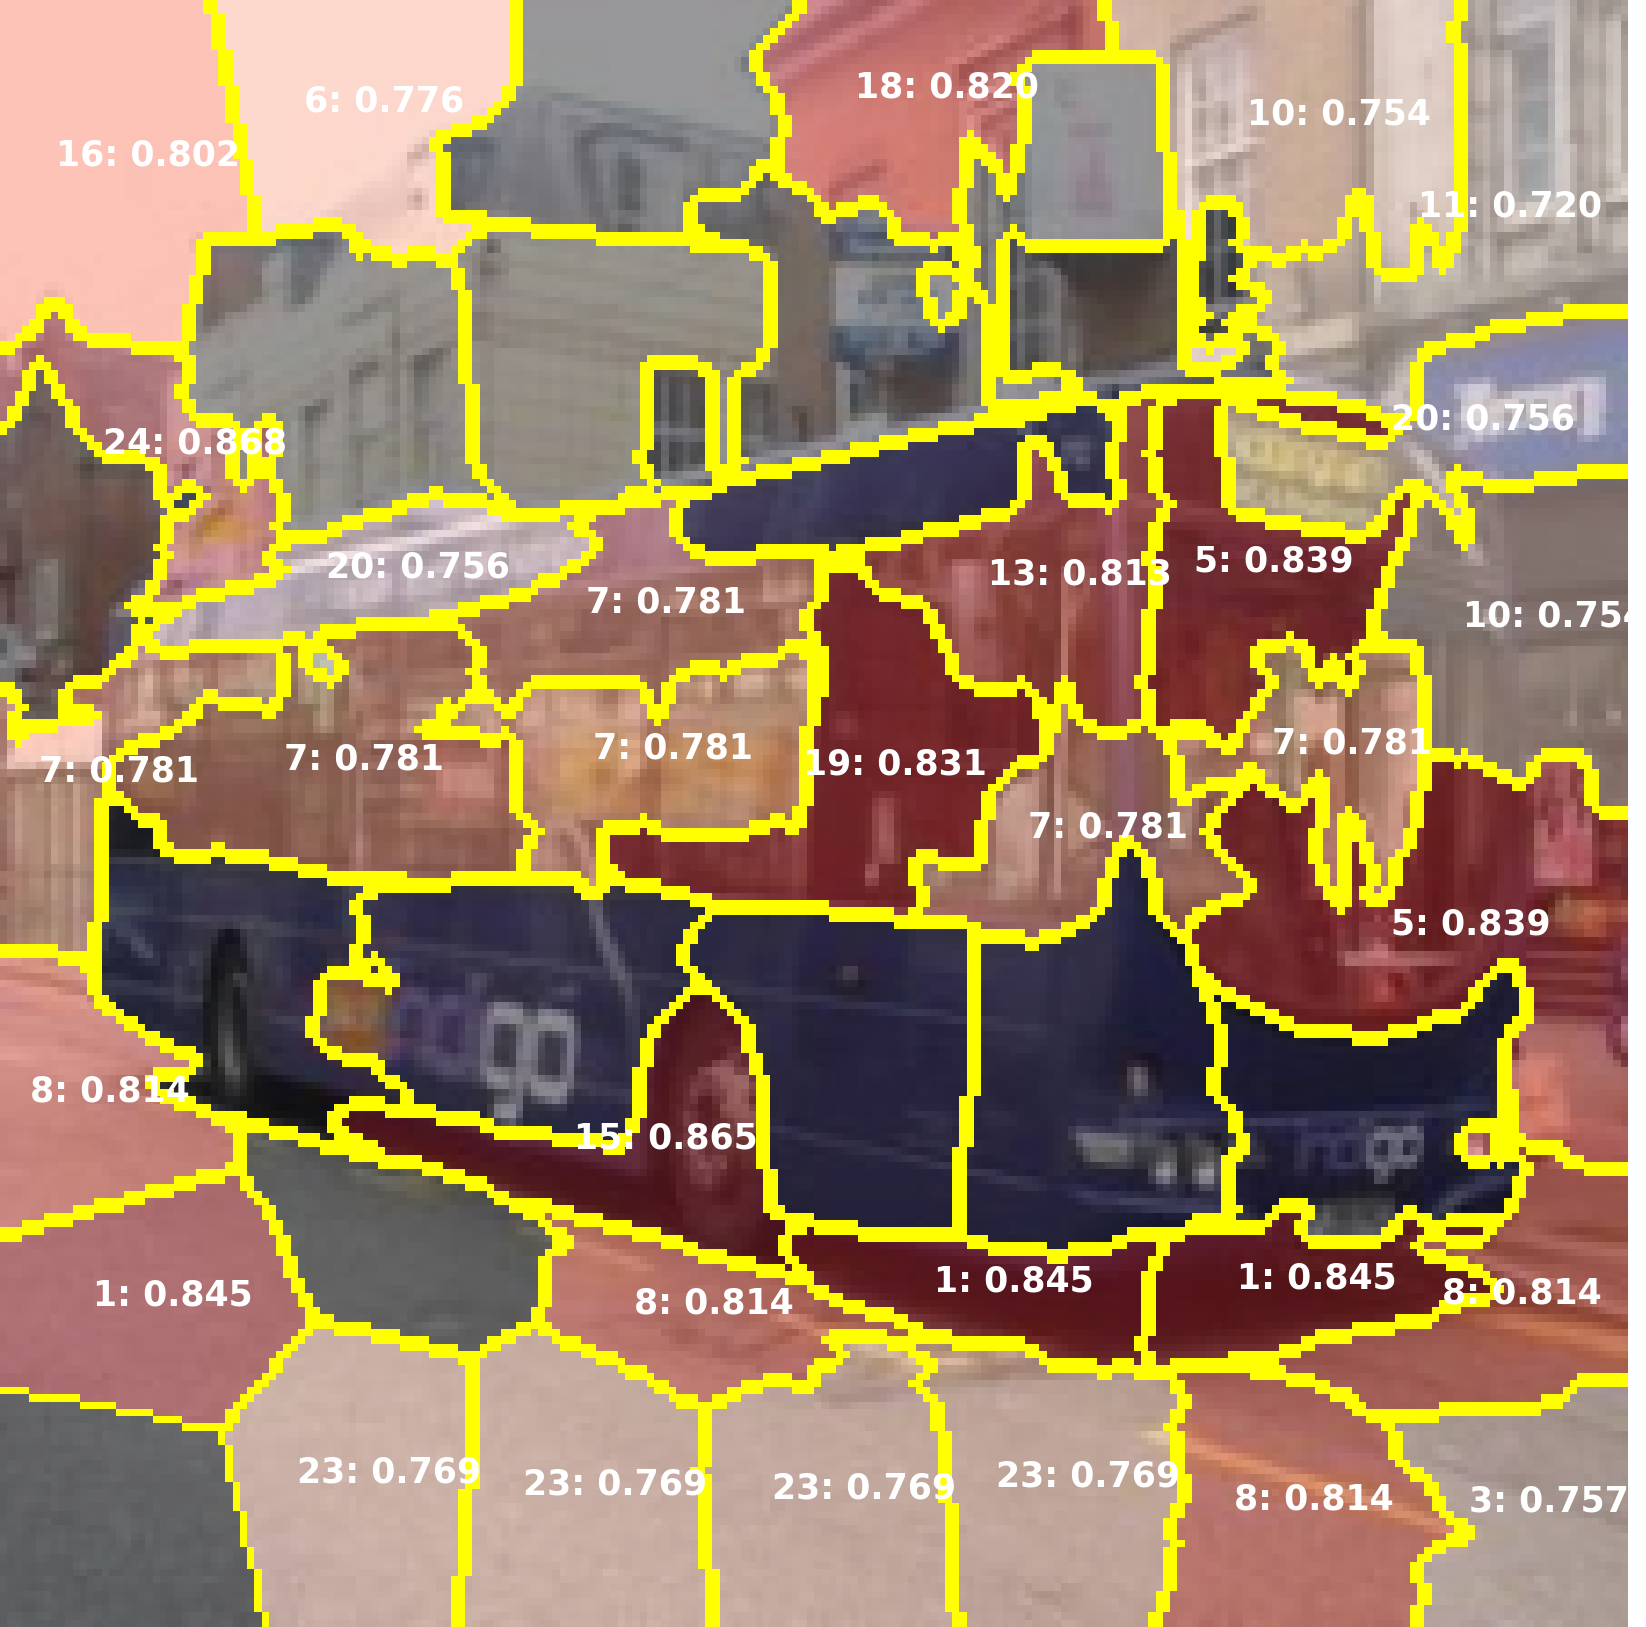

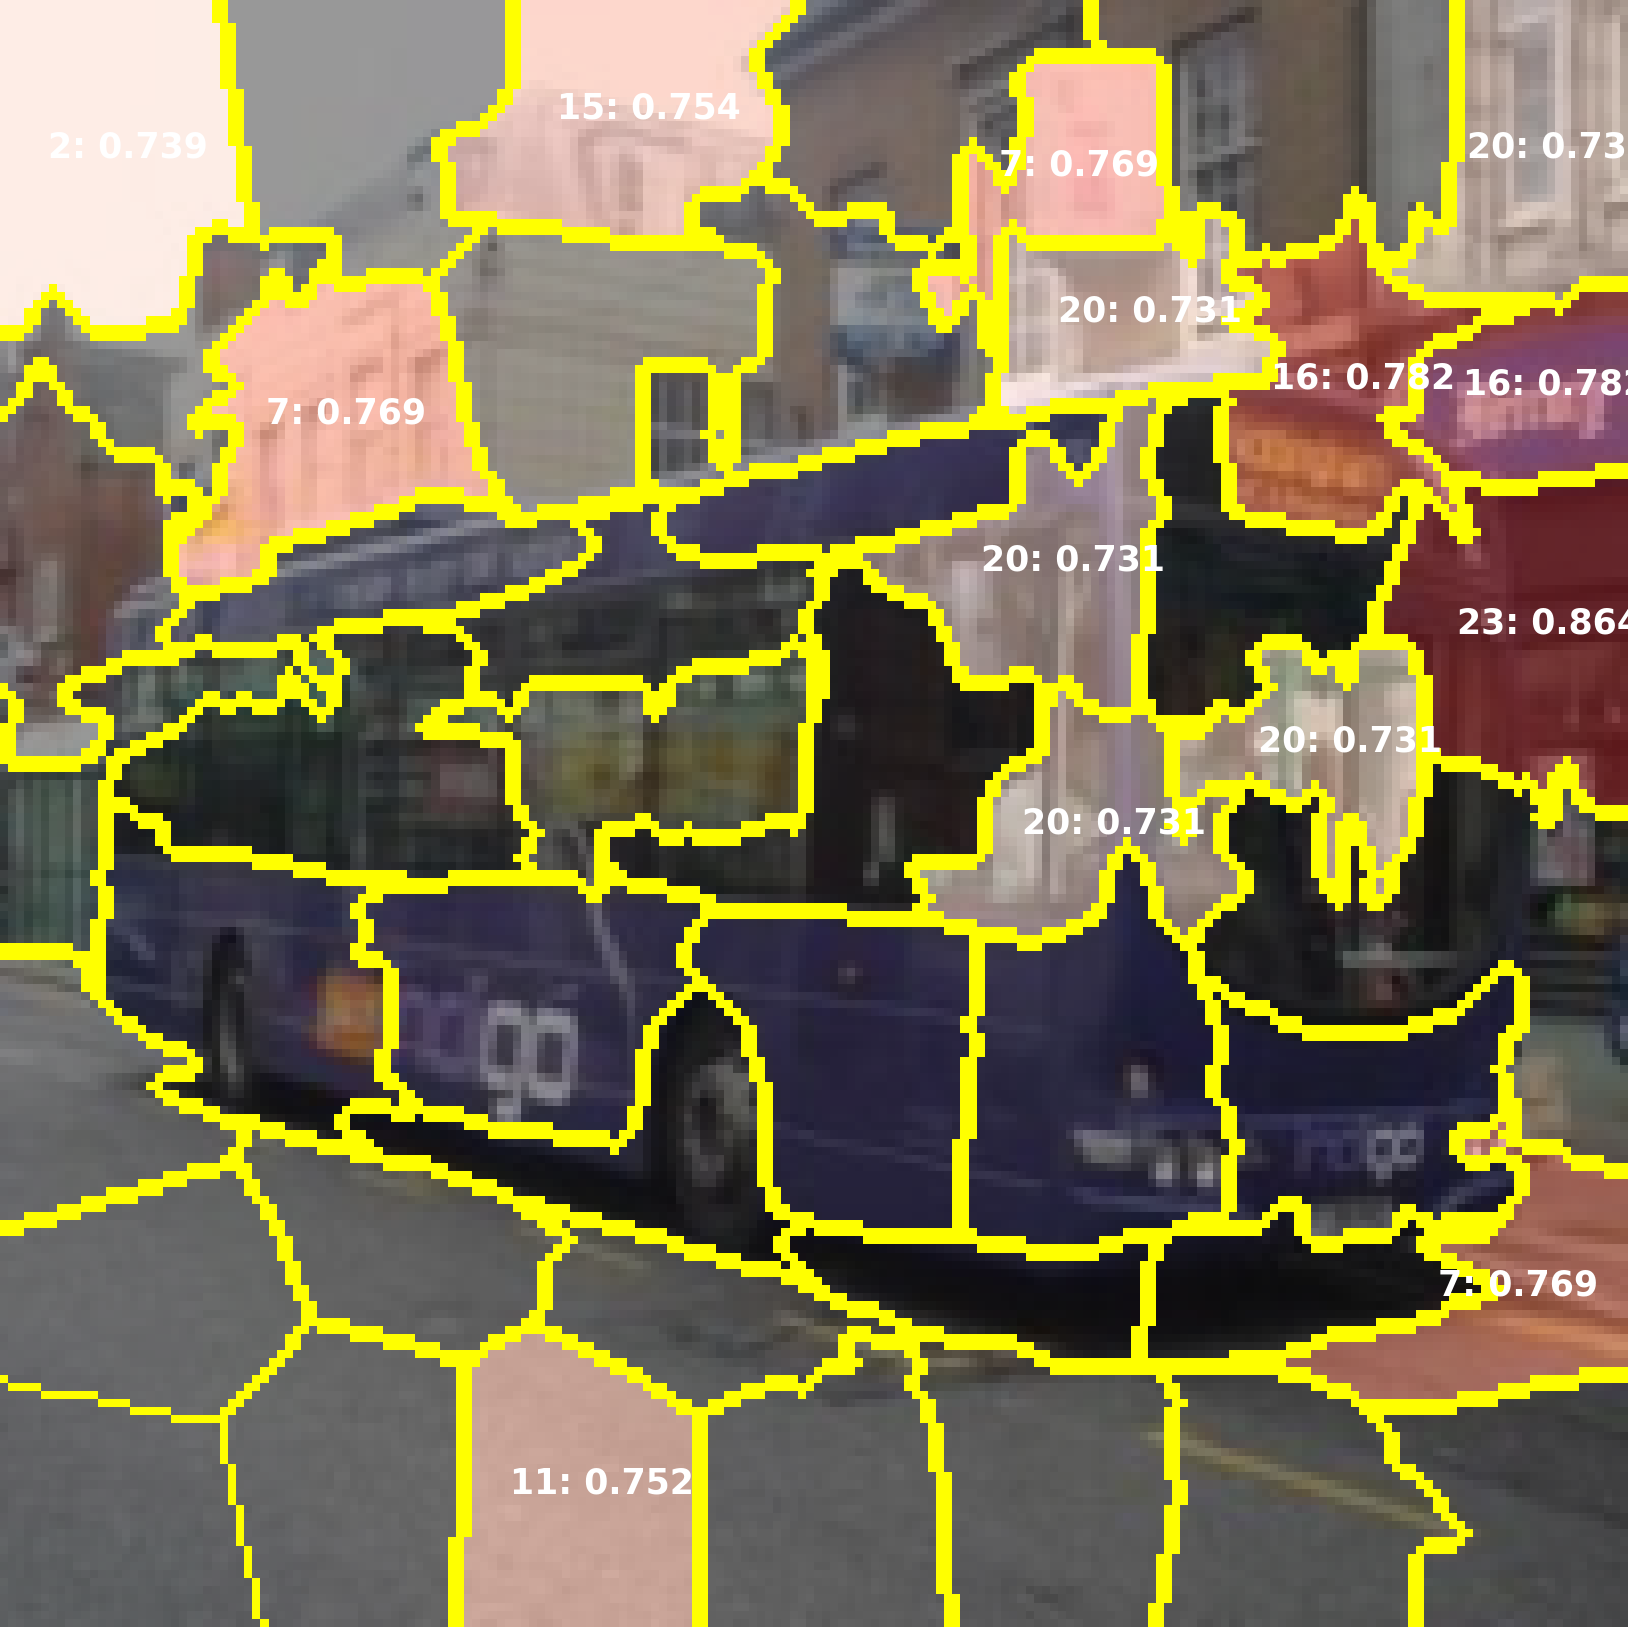

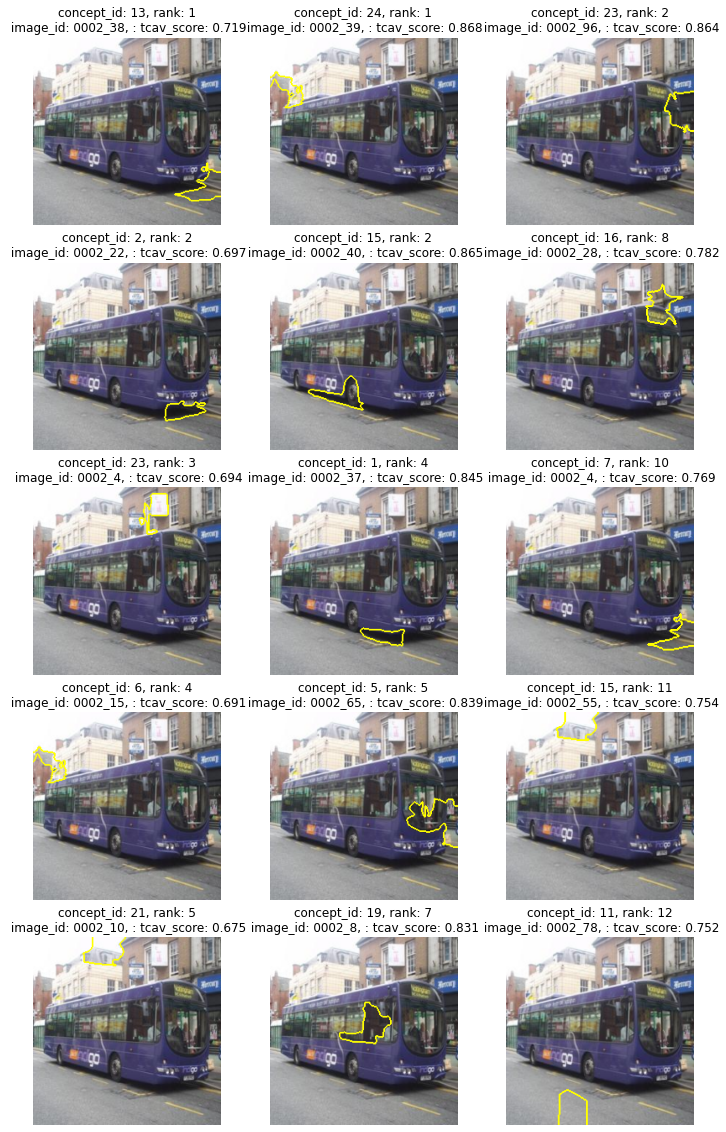

In [33]:
show_prediction_result(401, test_result, r_bus, d_bus, i_bus, 5)

In [52]:
b_image = get_overlap_mask('3', '0041_38', r_bus, '19', '0041_33', d_bus)

(-0.5, 223.5, 223.5, -0.5)

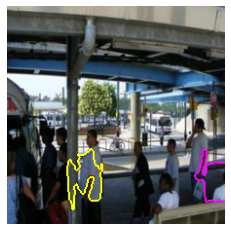

In [53]:
plt.imshow(b_image)
plt.axis("off")

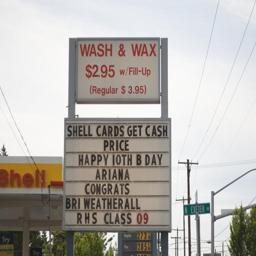

label :  gas-station
img - resnet: crosswalk, prediction_score: 0.99971
img - densenet: gas-station, prediction_score: 0.90285
8
10


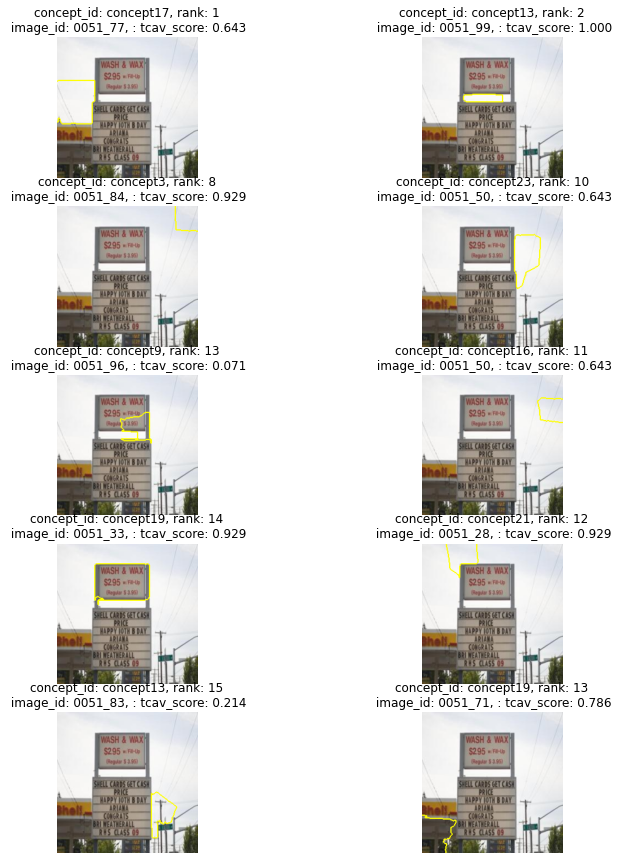

In [ ]:
show_prediction_result(270, test_result, r_gas, d_gas, 5)

In [94]:
'church-outdoor': [38, 52, 226, 260, 282]
church-outdoor': [1,44,63,151,163,166,167,202,209,242,245,247,272,286,288]

SyntaxError: EOL while scanning string literal (<ipython-input-94-e254912bb04f>, line 2)

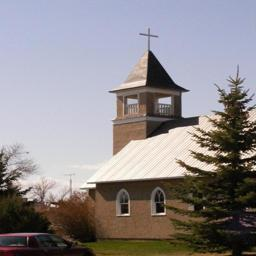

label :  church-outdoor
img - resnet: church-outdoor, prediction_score: 1.00000
img - densenet: church-outdoor, prediction_score: 0.99994
9
9


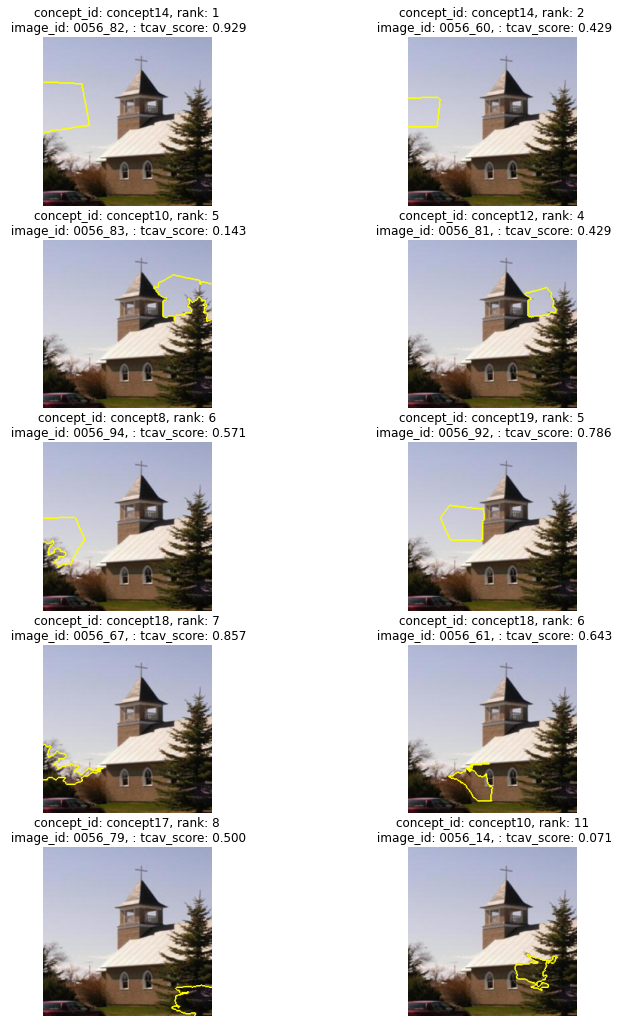

In [108]:
show_prediction_result(163, test_result, r_church, d_church, 5)

In [111]:
b_image = get_overlap_mask('concept10', '0056_83', r_church, 'concept12', '0056_81', d_church)

(-0.5, 223.5, 223.5, -0.5)

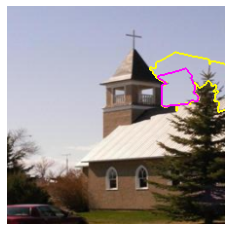

In [113]:
plt.imshow(b_image)
plt.axis("off")

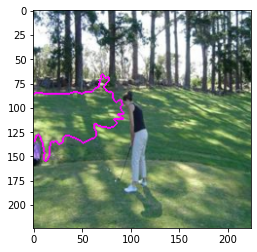

In [106]:
plt.imshow(b_image)

Places365_val_00012165.jpg


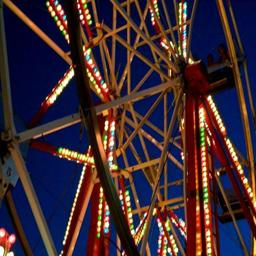

label :  amusement-park
label_int :  1
img - resnet_predicted_label: 1, prediction_score: 0.5373207927
img - densenet_predicted_label: 1, prediction_score: 0.9985929132


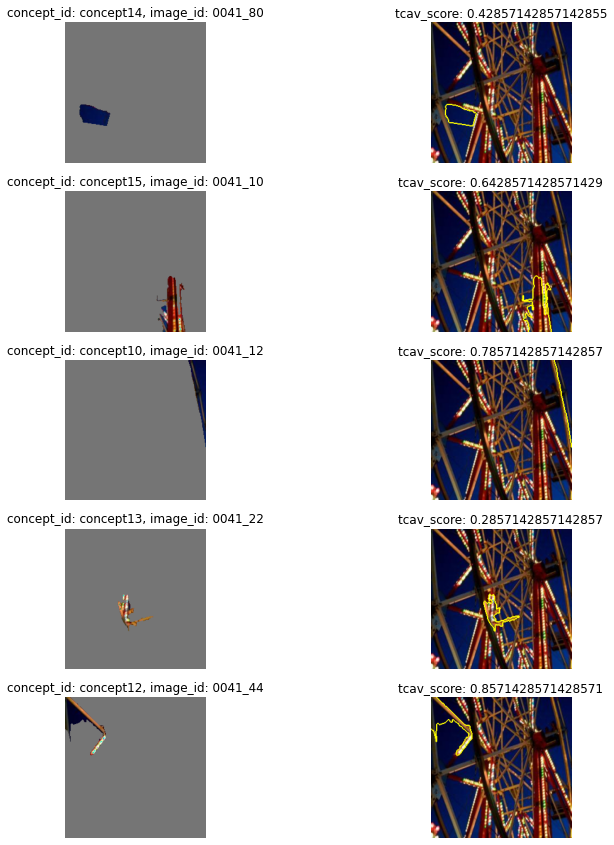

In [126]:
show_prediction_result(182, test_result, r_amuse, 5)

In [127]:
b_image = get_overlap_mask('concept14', '0041_80', r_amuse, 'concept9', '0041_81', d_amuse)

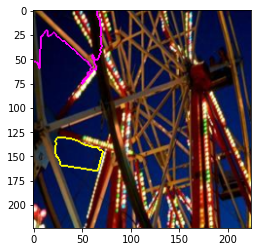

In [128]:
plt.imshow(b_image)